<a href="https://colab.research.google.com/github/haviet12/Artificial_Inteligent/blob/main/class(31_3)_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


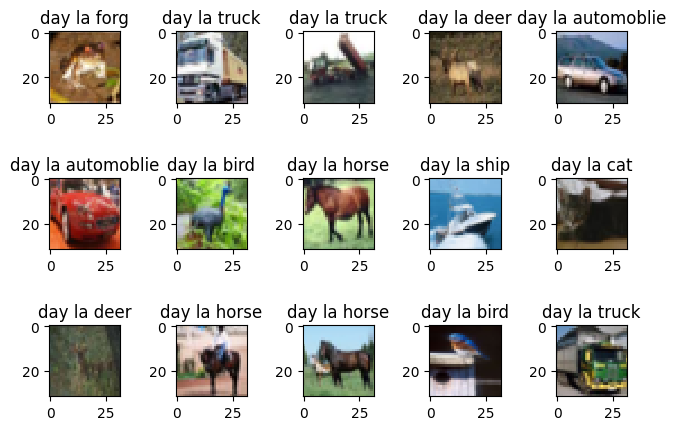

In [55]:
import matplotlib.pyplot as plt
pic_name=['Airplane',"automoblie",'bird','cat','deer','dog','forg','horse','ship','truck']
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray',interpolation="none")
  plt.title(f'day la {pic_name[int(y_train[i])]}')


In [42]:
from keras import Sequential
from keras.layers import Dense
from keras import models

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,), name ='input'))
model.add(Dense(512, activation='relu', name='hiden_1'))
model.add(Dense(512, activation='relu', name='hiden_2'))
model.add(Dense(10, activation='softmax', name='output'))
model.summary()
x=x_train
y=y_train


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 512)               1573376   
                                                                 
 hiden_1 (Dense)             (None, 512)               262656    
                                                                 
 hiden_2 (Dense)             (None, 512)               262656    
                                                                 
 output (Dense)              (None, 10)                5130      
                                                                 
Total params: 2,103,818
Trainable params: 2,103,818
Non-trainable params: 0
_________________________________________________________________


In [43]:
x_train =x_train.reshape((50000,32*32*3))
y_train.astype('float32')/255.0
x_test =x_test.reshape((10000,32*32*3))
y_test.astype('float32')/255.0

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 3072)
(50000, 1)
(10000, 3072)
(10000, 1)


In [44]:
from keras.utils import to_categorical
y_train =to_categorical(y_train, 10)
y_test = to_categorical(y_test,10)

from keras import metrics
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128,validation_data=(x_test,y_test))
loss , accur = model.evaluate(x_test, y_test)
print(f'do mat mat:{loss}')
print(f'do chinh xac:{accur}')

Epoch 1/10
391/391 [==============================] - 21s 52ms/step - loss: 43.1180 - accuracy: 0.1026 - val_loss: 2.3086 - val_accuracy: 0.1001
Epoch 2/10
391/391 [==============================] - 19s 48ms/step - loss: 2.5704 - accuracy: 0.0981 - val_loss: 2.3032 - val_accuracy: 0.0999
Epoch 3/10
391/391 [==============================] - 19s 50ms/step - loss: 2.3030 - accuracy: 0.0994 - val_loss: 2.3036 - val_accuracy: 0.0999
Epoch 4/10
391/391 [==============================] - 18s 47ms/step - loss: 2.3244 - accuracy: 0.0982 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 5/10
391/391 [==============================] - 20s 51ms/step - loss: 2.3042 - accuracy: 0.0966 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 6/10
391/391 [==============================] - 18s 47ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3034 - val_accuracy: 0.0999
Epoch 7/10
391/391 [==============================] - 18s 47ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3034 - val_accuracy

1/1 [==============================] - 0s 153ms/step
deer


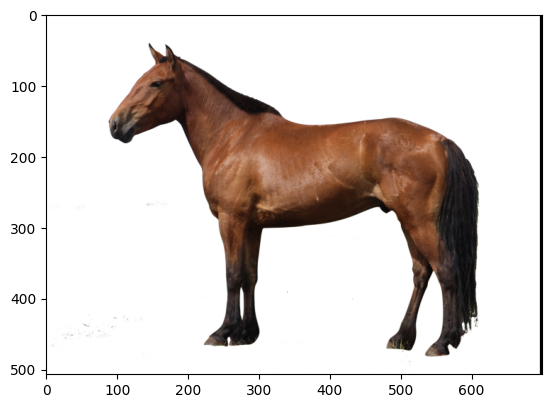

In [47]:

from keras.utils.image_utils import img_to_array
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt
url = 'horse.png'
img = load_img(url)
plt.imshow(img)
img = load_img(url, target_size= (32,32))
img = img_to_array(img)
img = img.reshape((1,32*32*3))
img = img.astype('float32')
img = img/255
a = int(np.argmax(model.predict(img), axis = 1))
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(class_name[a])